## Observations and Insights 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [55]:
# Combine the data into a single dataset

mouse_study_data = pd.merge(study_results, mouse_metadata, how ="left", on =['Mouse ID','Mouse ID'])

# Display the data table for preview
mouse_study_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [56]:
# Checking the number of mice.
total_mice= mouse_metadata.count()['Mouse ID']
total_mice

249

In [57]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupID=mouse_study_data.loc[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dupID
#duplicate_num = mouse_study_data.count()['Mouse ID']
#duplicate_num

array(['g989'], dtype=object)

In [58]:
# Optional: Get all the data for the duplicate mouse ID. 
ID_g989= mouse_study_data.loc[mouse_study_data['Mouse ID']=='g989']


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_study_results = mouse_study_data.loc[mouse_study_data['Mouse ID']!='g989']

# pd.DataFrame.drop_duplicates(dupID)
cleaned_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [61]:
# Checking the number of mice in the clean DataFrame.
grouping_mouse_Id = cleaned_study_results.groupby('Mouse ID')
grouping_mouse_Id.count()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [62]:
drug_regimen = cleaned_study_results.groupby('Drug Regimen')
drug_regimen

In [63]:
ave_tumorVol = drug_regimen['Tumor Volume (mm3)'].mean()
ave_tumorVol

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [64]:
median_tumorVol = drug_regimen['Tumor Volume (mm3)'].median()
median_tumorVol

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [65]:
var_tumorVol = drug_regimen['Tumor Volume (mm3)'].var()
var_tumorVol

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [66]:
std_tumorVol = drug_regimen['Tumor Volume (mm3)'].std()
std_tumorVol

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [67]:
sem_tumorVol = drug_regimen['Tumor Volume (mm3)'].sem()
sem_tumorVol

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


In [69]:
stat_tumorData = ({'Average of Tumor Vol (mm3)': ave_tumorVol, "Median of Tumor Vol (mm3)": median_tumorVol,'Tumor Volume Variance':var_tumorVol,'Standard Deviation': std_tumorVol,'Standard Error of the Mean': sem_tumorVol})
stat_tumor = pd.DataFrame(stat_tumorData)
stat_tumor

,Average of Tumor Vol (mm3),Median of Tumor Vol (mm3),Tumor Volume Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
#work on agg

## Bar and Pie Charts

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_measure = cleaned_study_results['Drug Regimen'].value_counts()
drug_measure

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

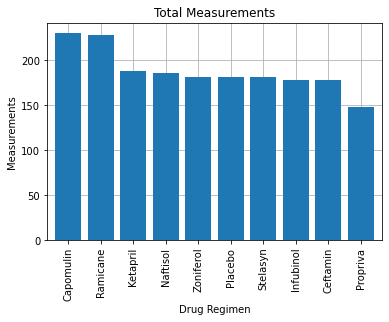

In [72]:
measure_bar=drug_measure.plot.bar(width=.8, zorder=3)
measure_bar.set_title("Total Measurements")
measure_bar.set_xlabel("Drug Regimen")
measure_bar.set_ylabel("Measurements")
measure_bar.grid(zorder=0)

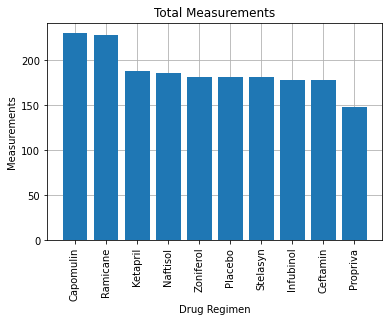

In [73]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
import numpy as np
import matplotlib.pyplot as plt

x_axis = x_axis = np.arange(len(drug_measure))
tick_locations = [value for value in x_axis]


plt.bar(x_axis, drug_measure, width = 0.8, zorder=3)

tk_loc = [value for value in x_axis]
plt.xticks(tk_loc, drug_measure.index.values)
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("Measurements")
plt.title('Total Measurements')

plt.grid(zorder=0)

plt.show()

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Import our dependencies



In [75]:
gender_data =cleaned_study_results[["Sex"]].value_counts()
gender_data

labels = ['Male','Female']

<AxesSubplot:title={'center':'Female vs. Male'}>

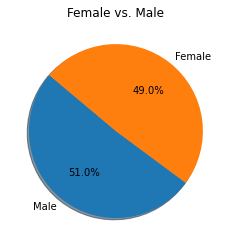

In [137]:
gender_data.plot(kind='pie',ylabel="", labels=labels, title= "Female vs. Male",startangle=140, autopct="%1.1f%%",shadow=True)

Text(0.5, 1.0, 'Female Vs. Male')

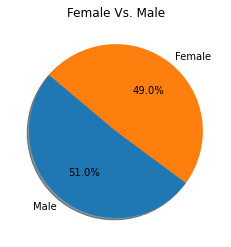

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
import numpy as np

plt.pie(gender_data, autopct="%1.1f%%",labels=labels, shadow=True, startangle=140)
plt.title("Female Vs. Male")

## Quartiles, Outliers and Boxplots

In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

sorting_Time = cleaned_study_results.sort_values(["Timepoint"], ascending=True)
last_Time = sorting_Time.loc[sorting_Time["Timepoint"] == 45]
final=last_Time.reset_index()
final

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,1846,x401,45,28.484033,0,Capomulin,Female,16,15
1,1847,p136,45,63.488697,2,Zoniferol,Female,5,28
2,1848,c559,45,61.840058,4,Zoniferol,Female,19,28
3,1849,s185,45,23.343598,1,Capomulin,Female,3,17
4,1850,i738,45,37.311846,2,Capomulin,Female,23,20
...,...,...,...,...,...,...,...,...,...
125,1798,c766,45,69.823146,4,Placebo,Female,13,26
126,1797,y793,45,31.896238,2,Capomulin,Male,17,17
127,1796,h246,45,74.104086,2,Ketapril,Male,13,30
128,1794,a685,45,66.083066,3,Infubinol,Male,8,30


In [87]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint= pd.merge(cleaned_study_results, final, on=['Mouse ID', "Timepoint"])
last_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,index,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,n364,45,31.095335,1,Ramicane,Male,4,17,1763,31.095335,1,Ramicane,Male,4,17
1,b128,45,38.982878,2,Capomulin,Female,9,22,1764,38.982878,2,Capomulin,Female,9,22
2,l661,45,59.851956,3,Ceftamin,Male,18,26,1765,59.851956,3,Ceftamin,Male,18,26
3,y865,45,64.729837,3,Ceftamin,Male,23,26,1766,64.729837,3,Ceftamin,Male,23,26
4,y769,45,68.594745,4,Ceftamin,Female,6,27,1767,68.594745,4,Ceftamin,Female,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,r944,45,41.581521,2,Capomulin,Male,12,25,1888,41.581521,2,Capomulin,Male,12,25
126,u364,45,31.023923,3,Capomulin,Male,18,17,1889,31.023923,3,Capomulin,Male,18,17
127,p438,45,61.433892,1,Ceftamin,Female,11,26,1890,61.433892,1,Ceftamin,Female,11,26
128,x773,45,58.634971,4,Placebo,Female,21,30,1891,58.634971,4,Placebo,Female,21,30


In [91]:

# First create a subset of the combined_data dataframe where 'Drug Regimen' is
# in [Capomulin, Ramicane, Infubinol, and Ceftamin]

# Create a list of the four drugs to examine
last_drug= ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Slice the original combined_data dataframe using the list of four drugs
# short_drug_list = last_timepoint[last_timepoint['Drug Regimen_x'].isin(last_drug)]
# short_drug_list

In [129]:

# Create empty list to fill with tumor vol data (for plotting)
volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in last_drug: 
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    vol=last_timepoint.loc[last_timepoint["Drug Regimen_x"] == drug, 'Tumor Volume (mm3)_x']

    
    # add subset 
    volume.append(vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"")
    print(f"{drug} IQR: {iqr}")
    print(f"{drug}'s lower quartile : {lowerq}")
    print(f"{drug}'s upper quartile: {upperq}")
    print(f"{drug}'s interquartile range: {iqr}")
    print(f"{drug}'s median: {quartiles[0.5]} ")



Capomulin IQR: 7.781863460000004
Capomulin's lower quartile : 32.37735684
Capomulin's upper quartile: 40.1592203
Capomulin's interquartile range: 7.781863460000004
Capomulin's median: 37.31184577 

Ramicane IQR: 7.527130082499998
Ramicane's lower quartile : 30.981175224999998
Ramicane's upper quartile: 38.508305307499995
Ramicane's interquartile range: 7.527130082499998
Ramicane's median: 34.848627300000004 

Infubinol IQR: 4.9311172099999965
Infubinol's lower quartile : 62.75445141
Infubinol's upper quartile: 67.68556862
Infubinol's interquartile range: 4.9311172099999965
Infubinol's median: 66.08306589 

Ceftamin IQR: 6.093590140000003
Ceftamin's lower quartile : 61.43389223
Ceftamin's upper quartile: 67.52748237
Ceftamin's interquartile range: 6.093590140000003
Ceftamin's median: 64.29983003 


In [253]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


Text(0.5, 1.0, 'Final Tumor Size')

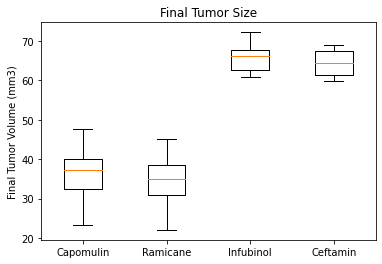

In [128]:
plt.boxplot(volume,labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Size')

In [98]:
cap=cleaned_study_results.loc[cleaned_study_results['Drug Regimen']== 'Capomulin']
mouse_Cap= cap.loc[cap['Mouse ID']=='r554']
mouse_Cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
227,r554,0,45.000000,0,Capomulin,Female,8,17
433,r554,5,45.781746,1,Capomulin,Female,8,17
498,r554,10,39.005494,2,Capomulin,Female,8,17
808,r554,15,35.463758,2,Capomulin,Female,8,17
940,r554,20,36.015589,2,Capomulin,Female,8,17
1243,r554,25,33.893345,3,Capomulin,Female,8,17
1340,r554,30,32.680655,3,Capomulin,Female,8,17
1534,r554,35,33.069337,3,Capomulin,Female,8,17
1734,r554,40,31.804841,3,Capomulin,Female,8,17
1788,r554,45,32.377357,3,Capomulin,Female,8,17


## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Vol over Time with Capomulin')

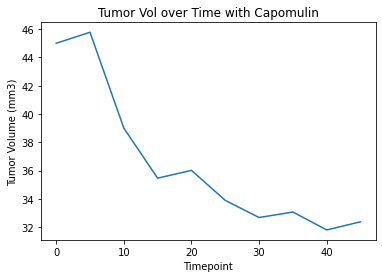

In [119]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

plt.plot(mouse_Cap['Timepoint'], mouse_Cap['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Vol over Time with Capomulin')

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


Text(0.5, 1.0, 'Tumor Volume vs Weight')

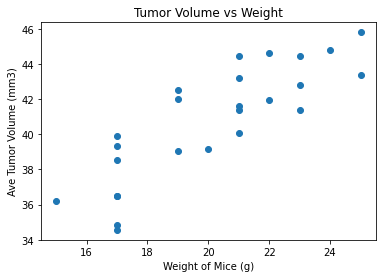

In [121]:
aveCap=cap.groupby(['Mouse ID']).mean()

plt.scatter(aveCap['Weight (g)'], aveCap ['Tumor Volume (mm3)'])
plt.xlabel('Weight of Mice (g)')
plt.ylabel('Ave Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')

## Correlation and Regression

In [122]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(aveCap['Weight (g)'],aveCap['Tumor Volume (mm3)'])[0],2)


In [123]:
model = st.linregress(aveCap['Weight (g)'],aveCap['Tumor Volume (mm3)'])


Text(0.5, 1.0, 'Tumor Volume vs Weight')

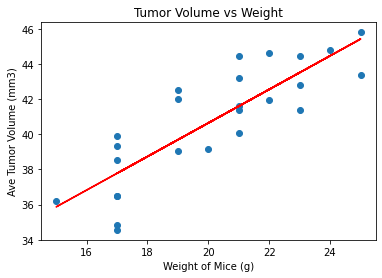

In [125]:
y_values = aveCap['Weight (g)']*model[0]+model[1]
plt.scatter(aveCap['Weight (g)'],aveCap['Tumor Volume (mm3)'])
plt.plot(aveCap['Weight (g)'],y_values,color="red")

plt.xlabel('Weight of Mice (g)')
plt.ylabel('Ave Tumor Volume (mm3)')
plt.title('Tumor Volume vs Weight')